# Ensemble Tree Exercise (Core)
- **Student:** Michael McCann
- **Date:** 02 MAR 2022

## Setup -Mount Drive, Import Libraries and Data

In [21]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn import set_config
set_config(display='diagram')

In [23]:
## Load and Inspect the Data
boston_filepath = '/content/drive/MyDrive/Data/Boston_Housing_from_Sklearn.csv'
bos_df = pd.read_csv(boston_filepath)

## Data Dictionary

- CRIM: per capita crime rate by town
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- PTRATIO: pupil-teacher ratio by town
- LSTAT: % lower economic status of the population
- PRICE: Median value of owner-occupied homes in $1000's


In [24]:
display(bos_df.head())
bos_df.info()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [25]:
## No Duplicates or NAs
print(f"Number of NAs: {bos_df.isna().sum().sum()}")
print(f"Number of Duplicates: {bos_df.duplicated().sum()}")

Number of NAs: 0
Number of Duplicates: 0


In [26]:
corr_mask =  bos_df.corr()
round(bos_df.corr()[(corr_mask['PRICE'] >= .5) | (corr_mask['PRICE'] <= -.5)]['PRICE'], 2)

## Features with a correlation coefficient above/below  .5/-.5 relative to Price: 
## Rooms, Pupil-Teacher Ration, and percent lower economic status TRATIO, LSTAT

RM         0.70
PTRATIO   -0.51
LSTAT     -0.74
PRICE      1.00
Name: PRICE, dtype: float64

## Train Test Split

In [27]:
y = bos_df['PRICE']
X = bos_df[['RM', 'PTRATIO', 'LSTAT']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Run Scaler

In [28]:
# Instantiate and Fit StandardScaler to training set

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [29]:
# Run StandardScaler and transform back into DF
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

cols = ('RM', 'PTRATIO', 'LSTAT')

X_train_output = pd.DataFrame(scaled_train, columns = cols)
X_test_output = pd.DataFrame(scaled_test, columns = cols)

# Linear Regression

In [30]:
# Instantiate Linear Regression as reg
reg = LinearRegression()

In [31]:
# Fit Linear Regression to the model
reg.fit(X_train_output, y_train)

LinearRegression()

In [32]:
# Get the score...
train_score = reg.score(X_train_output, y_train)
test_score = reg.score(X_test_output, y_test)
print(f"training set R^2 value: {round(train_score,4)}")
print(f"test set R^2 value: {round(test_score, 4)}")

training set R^2 value: 0.6878
test set R^2 value: 0.6332


# Regression Tree Model

In [33]:
dec_tree = DecisionTreeRegressor(random_state = 42)

dec_tree.fit(X_train_output, y_train)

DecisionTreeRegressor(random_state=42)

In [34]:
train_preds = dec_tree.predict(X_train_output)
test_preds = dec_tree.predict(X_test_output)

In [35]:
train_score = dec_tree.score(X_train_output, y_train)
test_score = dec_tree.score(X_test_output, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {round(test_score, 3)}')

Train Score: 1.0
Test Score: 0.456


In [36]:
# Default Tree Values
print(f'Tree Depth: {dec_tree.get_depth()}')
print(f'Tree Leaves: {dec_tree.get_n_leaves()}')

Tree Depth: 20
Tree Leaves: 368


In [62]:
max_depth_range = list(range(2,20))

r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth,
                                     random_state = 42)
    dec_tree.fit(X_train_output, y_train)
    score = dec_tree.score(X_test_output, y_test)
    r2.append(score)

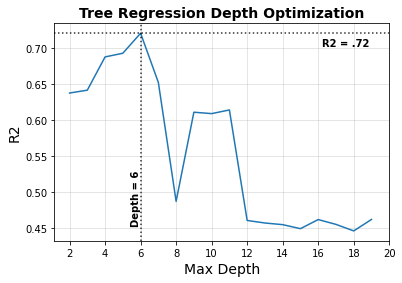

In [64]:
plt.plot(max_depth_range, r2)
plt.title('Tree Regression Depth Optimization', fontsize = 14, weight = 'bold')
plt.xlabel('Max Depth', fontsize = 14)#, weight = 'bold')
plt.ylabel('R2', fontsize = 14)#, weight = 'bold')
plt.xticks(range(2,21,2))
plt.axvline(6, ls = ':', color = 'k', alpha = .8)
plt.axhline(.72, ls = ':', color = 'k', alpha = .8)
plt.annotate('R2 = .72', (16.2,.702), weight = 'bold')
plt.annotate('Depth = 6', (5.45,.455), weight = 'bold', rotation = 90)
plt.grid(alpha = .4);

In [39]:
def depth_test(depth = 20):
    dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dec_tree.fit(X_train_output, y_train)
    train_score = dec_tree.score(X_train_output, y_train)
    test_score = dec_tree.score(X_test_output, y_test)

    print(f'Train Score: {train_score}')
    print(f'Test Score: {round(test_score, 3)}')


In [40]:
depth_test(6)

Train Score: 0.9214827076541541
Test Score: 0.72


In [ ]:
# Bagged Trees

In [113]:
n_estimators_test_bag = list(range(30,40,2))

r2_bag = []
for n in n_estimators_test_bag:
    rf = RandomForestRegressor(max_depth = 5,
                                n_estimators = n,
                               random_state = 42)
    rf.fit(X_train_output, y_train)
    score = rf.score(X_test_output, y_test)
    r2_bag.append(score)

Text(0, 0.5, 'R2')

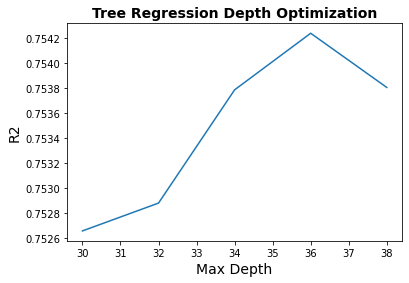

In [117]:
plt.plot(n_estimators_test_bag, r2_bag)
plt.title('Tree Regression Depth Optimization', fontsize = 14, weight = 'bold')
plt.xlabel('Max Depth', fontsize = 14)#, weight = 'bold')
plt.ylabel('R2', fontsize = 14)#, weight = 'bold')

In [122]:
# Instantiate and Fit
bagreg = BaggingRegressor(random_state = 42, n_estimators=36)
bagreg.fit(X_train_output, y_train)

BaggingRegressor(n_estimators=36, random_state=42)

In [48]:
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [123]:
bagreg_train_score = bagreg.score(X_train_output, y_train)
bagreg_test_score = bagreg.score(X_test_output, y_test)
print(f'Bagged Trees Train Score: {bagreg_train_score:.3f}')
print(f'Bagged Trees Test Scpre" {bagreg_test_score:.3f}')

Bagged Trees Train Score: 0.970
Bagged Trees Test Scpre" 0.728


# Random Forest

In [96]:
max_depth_range_rf = list(range(2,10))

r2_rf = []
for depth in max_depth_range:
    rf = RandomForestRegressor(max_depth = depth,
                                     random_state = 42)
    rf.fit(X_train_output, y_train)
    score = rf.score(X_test_output, y_test)
    r2_rf.append(score)

Text(0, 0.5, 'R2')

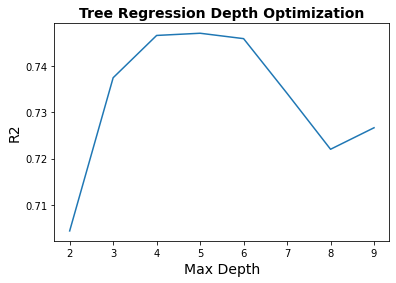

In [97]:
plt.plot(max_depth_range_rf, r2_rf)
plt.title('Tree Regression Depth Optimization', fontsize = 14, weight = 'bold')
plt.xlabel('Max Depth', fontsize = 14)#, weight = 'bold')
plt.ylabel('R2', fontsize = 14)#, weight = 'bold')

In [98]:
n_estimators_test_rf = list(range(100,200,10))

r2_rf2 = []
for n in n_estimators_test_rf:
    rf = RandomForestRegressor(max_depth = 5,
                                n_estimators = n,
                               random_state = 42)
    rf.fit(X_train_output, y_train)
    score = rf.score(X_test_output, y_test)
    r2_rf2.append(score)

Text(0, 0.5, 'R2')

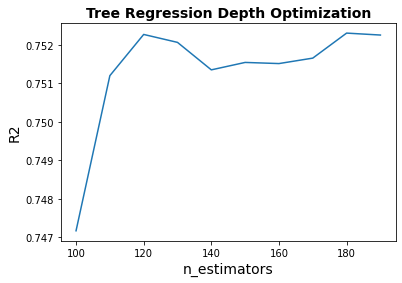

In [99]:
plt.plot(n_estimators_test_rf, r2_rf2)
plt.title('Tree Regression Depth Optimization', fontsize = 14, weight = 'bold')
plt.xlabel('n_estimators', fontsize = 14)#, weight = 'bold')
plt.ylabel('R2', fontsize = 14)#, weight = 'bold');

In [90]:
# Instantiate and Fit
rf = RandomForestRegressor(random_state = 42, n_estimators=180, max_depth = 5)
rf.fit(X_train_output, y_train)

RandomForestRegressor(max_depth=5, n_estimators=180, random_state=42)

In [91]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 180,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [92]:
rf_train_scores = rf.score(X_train_output, y_train)
rf_test_scores = rf.score(X_test_output, y_test)
print(f'Random Forest Train Score: {rf_train_scores:.3f}')
print(f'Random Forest Test Score: {rf_test_scores:.3f}')

Random Forest Train Score: 0.914
Random Forest Test Score: 0.752
